In [2]:
import tensorflow as tf 

fashion_mist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.shape)


(60000, 28, 28)


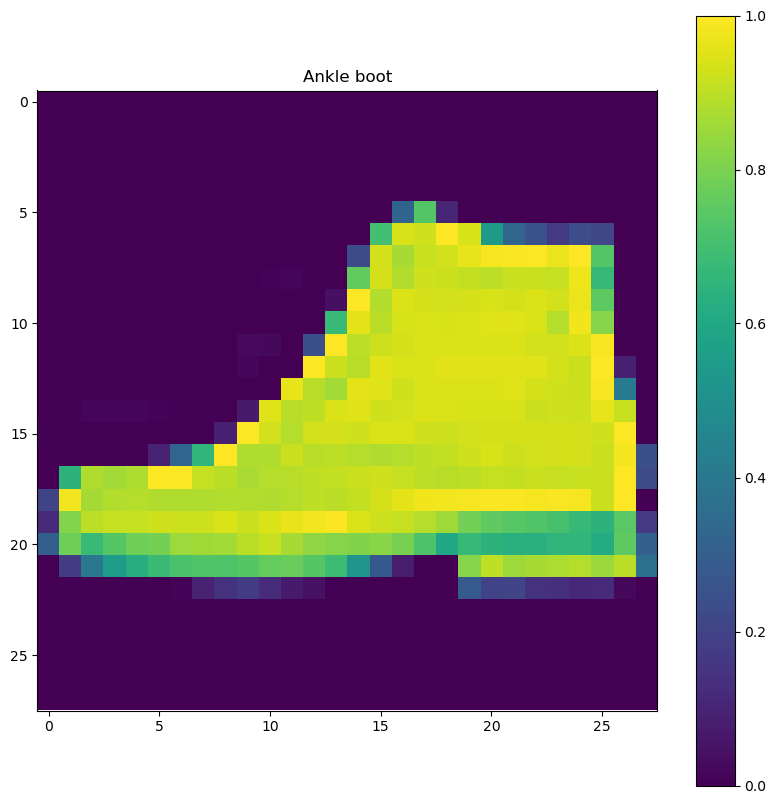

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(train_images[42])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[42]])
plt.show()

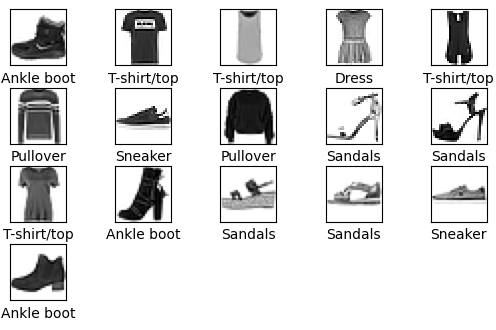

In [4]:
for i in range(16):
    plt.subplot(5, 5, i + 1)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [5]:
X_train = train_images.reshape((train_images.shape[0], 28, 28, 1))
X_test = test_images.reshape((test_images.shape[0], 28, 28, 1))
print ( X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
tf.random.set_seed(42)

from tensorflow.keras import datasets, layers, models, losses 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3),activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

#output layer with softmax activation function 

model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss= losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

In [9]:
model.fit(X_train, train_labels, epochs=10, batch_size=64, validation_data=(X_test, test_labels))


Epoch 1/10
938/938 [==============================] - 32s 32ms/step - loss: 0.5258 - accuracy: 0.8052 - val_loss: 0.3910 - val_accuracy: 0.8590
Epoch 2/10
938/938 [==============================] - 29s 31ms/step - loss: 0.3333 - accuracy: 0.8773 - val_loss: 0.3736 - val_accuracy: 0.8606
Epoch 3/10
938/938 [==============================] - 29s 31ms/step - loss: 0.2838 - accuracy: 0.8955 - val_loss: 0.3042 - val_accuracy: 0.8863
Epoch 4/10
938/938 [==============================] - 29s 31ms/step - loss: 0.2537 - accuracy: 0.9062 - val_loss: 0.2799 - val_accuracy: 0.8970
Epoch 5/10
938/938 [==============================] - 29s 31ms/step - loss: 0.2290 - accuracy: 0.9148 - val_loss: 0.2674 - val_accuracy: 0.9030
Epoch 6/10
938/938 [==============================] - 29s 31ms/step - loss: 0.2066 - accuracy: 0.9234 - val_loss: 0.2638 - val_accuracy: 0.9032
Epoch 7/10
938/938 [==============================] - 30s 32ms/step - loss: 0.1895 - accuracy: 0.9299 - val_loss: 0.2689 - val_accuracy:

In [10]:
test_loss,test_acc = model.evaluate(X_test, test_labels, verbose = 2)
print ('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 0.2709 - accuracy: 0.9065 - 4s/epoch - 12ms/step

Test accuracy: 0.906499981880188


In [11]:
predictions = model.predict(X_test)
print(predictions[0])

313/313 [==============================] - 4s 11ms/step
[2.3041500e-09 9.1700136e-10 6.8391598e-10 5.4531970e-09 3.0513909e-09
 7.5618505e-07 5.1248030e-11 1.0983542e-05 7.7306467e-11 9.9998814e-01]


In [12]:
import numpy as np 
print ('Predication labels for the first image:', np.argmax(predictions[0]))

Predication labels for the first image: 9


In [13]:
print('True label for the first image:', test_labels[0])

True label for the first image: 9


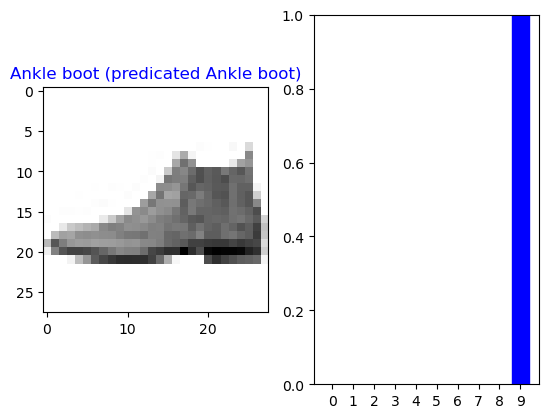

In [17]:
def plot_image_prediction(i, images, predictions, labels,class_names):
    plt.subplot(1,2,1)
    plt.imshow(images[i], cmap=plt.cm.binary)
    prediction = np.argmax(predictions[i])
    color = 'blue' if prediction == labels[i] else 'red'
    plt.title(f'{class_names[labels[i]]} (predicated {class_names[prediction]})', color=color)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plot = plt.bar(range(10),predictions[i], color = "#3F4C4CFF")
    plt.ylim([0,1])
    plot[prediction].set_color('red')
    plot[labels[i]].set_color('blue')
    plt.show()
    
plot_image_prediction(0, X_test, predictions, test_labels, class_names)

In [18]:
filters,_ = model.layers[2].get_weights()

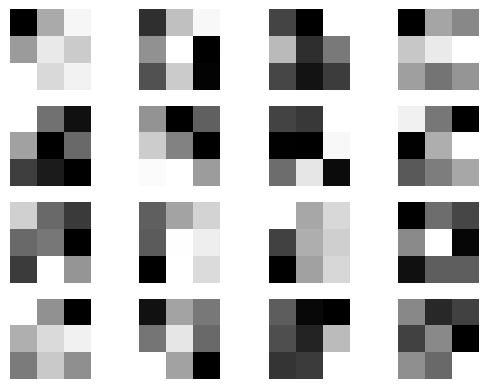

In [19]:
f_min, f_max = filters.min(),filters.max()
filters = (filters - f_min)/(f_max - f_min)
n_filters = 16 
for i in range (n_filters):
    plt.subplot(4,4,i+1)
    plt.imshow(filters[:,:,0,i], cmap='gray')
    plt.axis('off')
plt.show()

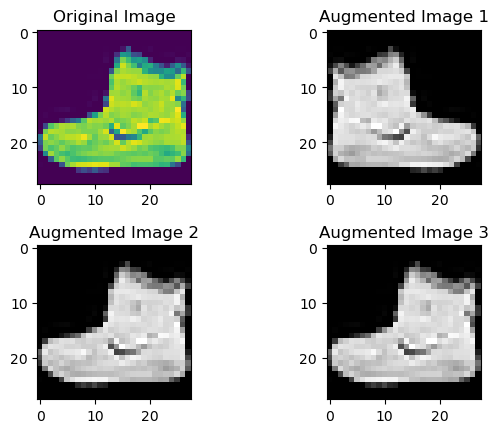

In [ ]:
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# Create the ImageDataGenerator instance
datagen = ImageDataGenerator(rotation_range=90, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

def generate_plot_pics(datagen, original_img, save_prefix):
    folder = 'augmented_pics'
    
    # Create the directory if it doesn't exist
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    # Generate augmented images
    i = 0
    for batch in datagen.flow(original_img.reshape((1, 28, 28, 1)), batch_size=1, save_to_dir=folder, save_prefix=save_prefix, save_format='png'):
        i += 1
        if i > 2:  # Generate only 2 augmented images
            break
    
    # Plot the original image
    plt.subplot(2, 2, 1)
    plt.imshow(original_img.squeeze(), )  # Use squeeze to remove single-dimensional entries
    plt.title('Original Image')
    
    # Load and plot the augmented images
    augmented_files = os.listdir(folder)
    for j, file in enumerate(os.listdir(folder)):
        if j <3:
            plt.subplot(2, 2, j + 2)  # Start from the second subplot
            aug_img = load_img(os.path.join(folder, file))
            plt.imshow(aug_img)
            plt.title(f'Augmented Image {j + 1}')
    
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.show()

# Example usage (assuming train_images is defined and contains images)
generate_plot_pics(datagen, train_images[0], 'hv_flip')
